#### This notebook is used to analyze the generated FGT and Breast mask
`NOTE: The code to generate the masks is in another notebook [here](ispy.ipynb)`

In [2]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

#  listing path names for images
pre_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm'
post_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-03969/1-042.dcm'
fgt_pre_path = 'fgt_pre/output.npy'
fgt_post_path = 'fgt_post/output.npy'

In [3]:
# #we are going to only save slice #42 of the output.npy


# fgt_seg_42 = np.load(fgt_pre_path)
# slice_42 = fgt_seg_42[:,:,:,42]
# #print(slice_42.shape)
# np.save('fgt_pre/slice_42_pre.npy', slice_42)
# #print('slice 42 saved')

# fgt_seg_42_post = np.load(fgt_post_path)
# slice_42_post = fgt_seg_42[:,:,:,42]
# np.save('fgt_post/slice_42_post.npy', slice_42_post)
# #print('slice 42 saved')

# #plotting of the 42nd slice for pre and post
# fgt_slice_42_pre = np.load('fgt_pre/slice_42_pre.npy')
# #print(fgt_slice_42_pre.ndim)

# # Create a figure with 1 row and 2 columns
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# axes[0].set_title('MRI precontrast Volume')
# axes[0].imshow(fgt_slice_42_pre[0,:,:], cmap = 'Greys')
# axes[0].axis('off')

# fgt_slice_42_post = np.load('fgt_post/slice_42_post.npy')

# axes[1].set_title('MRI postcontrast Volume')
# axes[1].imshow(fgt_slice_42_post[0,:,:], cmap='Greys')
# axes[1].axis('off')

# # Show the figure
# plt.tight_layout()
# plt.show()


Masking

(512, 512)


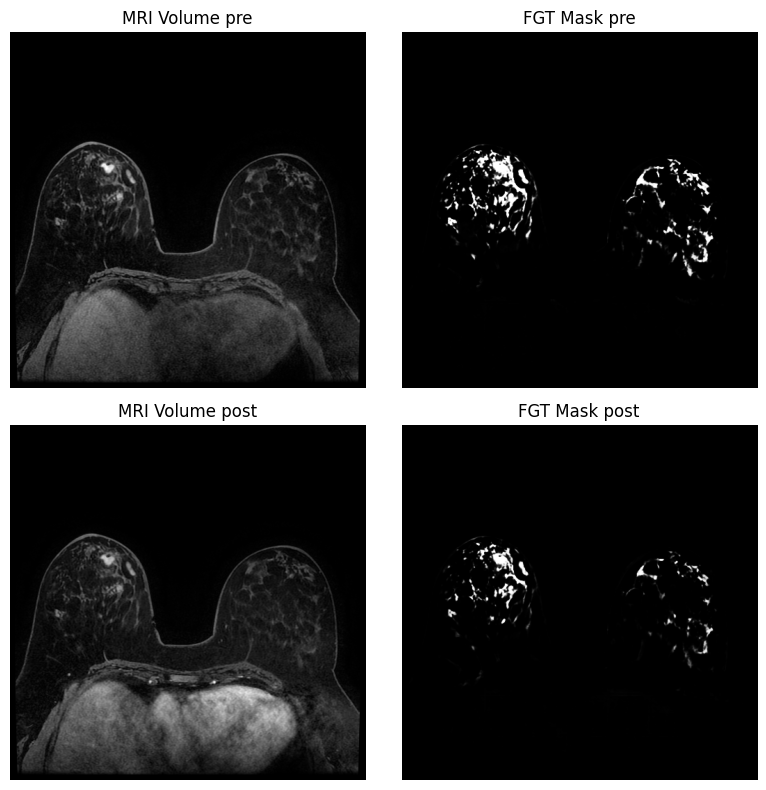

In [4]:


#data preparation and loading
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

pre_contrast_dcm = pydicom.dcmread(pre_path)
post_contrast_dcm = pydicom.dcmread(post_path)

# # Extract image data from the DICOM files
pre_contrast_img = pre_contrast_dcm.pixel_array
print(pre_contrast_img.shape)

# plt.title('MRI  Volume')
# plt.imshow(pre_contrast_img[:,:], cmap = 'gray')
# plt.axis('off')
# plt.show()

post_contrast_img = post_contrast_dcm.pixel_array

# Extract and rotate image data
pre_contrast_img = np.rot90(pre_contrast_dcm.pixel_array, k=2)
post_contrast_img = np.rot90(post_contrast_dcm.pixel_array, k=2)

# plt.title('MRI  Volume')
# plt.imshow(pre_contrast_img[:,:], cmap = 'gray')
# plt.axis('off')
# plt.show()

#fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot pre-contrast DICOM image
# axes[0, 0].imshow(pre_contrast_img[:,:], cmap='gray')
# axes[0, 0].set_title('Pre-Contrast DICOM')


axes[0, 0].set_title('MRI Volume pre')
axes[0, 0].imshow(pre_contrast_img[:,:], cmap = 'gray')
axes[0, 0].axis('off')
#plt.show()



# Plot pre-contrast segmentation
#axes[0, 1].imshow(fgt_pre_path[0,:,:], cmap='Greys')
#axes[0, 1].set_title('Pre-Contrast FGT')


# Plot post-contrast DICOM image
#axes[1, 0].imshow(post_contrast_img, cmap='gray')
#axes[1, 0].set_title('Post-Contrast DICOM')
fgt_seg_pre = np.load(fgt_pre_path)
fgt_seg_post = np.load(fgt_post_path)

axes[0, 1].set_title('FGT Mask pre')
axes[0, 1].imshow(fgt_seg_pre[2,:,:,42], cmap = 'gray')
axes[0, 1].axis('off')


axes[1, 0].set_title('MRI Volume post')
axes[1, 0].imshow(post_contrast_img[:,:], cmap = 'gray')
axes[1, 0].axis('off')

axes[1, 1].set_title('FGT Mask post')
axes[1, 1].imshow(fgt_seg_post[2,:,:,42], cmap = 'gray')
axes[1, 1].axis('off')


# Plot post-contrast segmentation
#axes[1, 1].imshow(fgt_post_path, cmap='Greys')
#axes[1, 1].set_title('Post-Contrast FGT')

# Adjust layout
plt.tight_layout()
plt.show()


### Now plotting a histogram of the signal intensities for the new pre and post contrast fopr the orginial MRI image

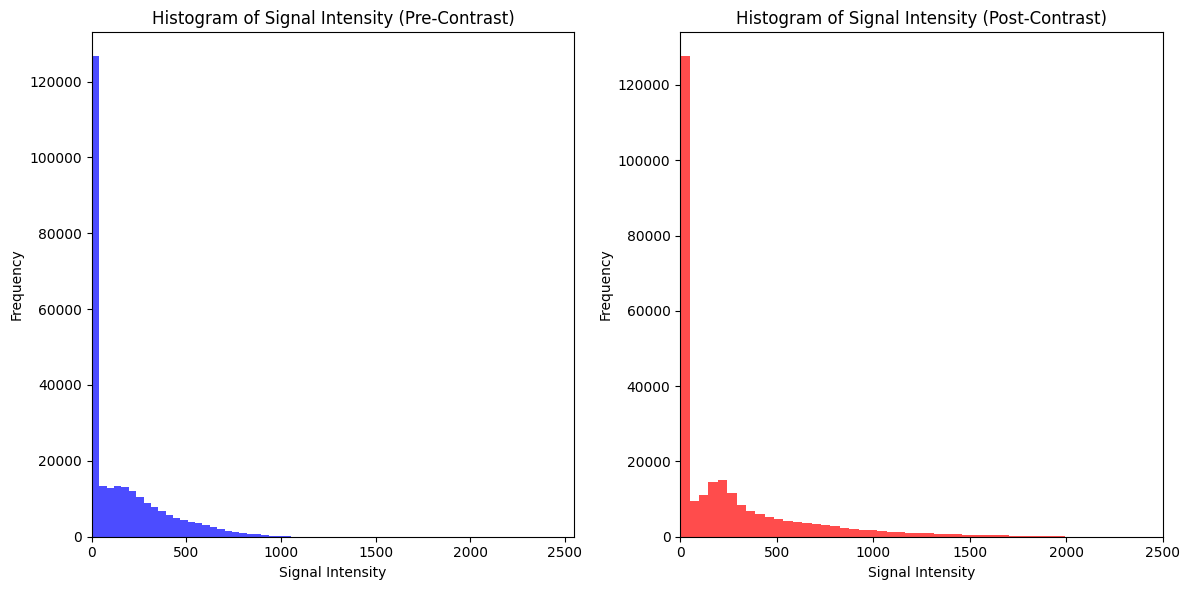

In [5]:


# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for pre-contrast DICOM
plt.subplot(1, 2, 1)
plt.hist(pre_contrast_img.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Signal Intensity (Pre-Contrast)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0,2550)

# Histogram for post-contrast DICOM
plt.subplot(1, 2, 2)
plt.hist(post_contrast_img.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histogram of Signal Intensity (Post-Contrast)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0,2500)

# Show the plots
plt.tight_layout()
plt.show()


### pre-post of the original MRI image and pre-post / pre of the original MRI image

MORE GRAPHS FOR VISUALIZATION

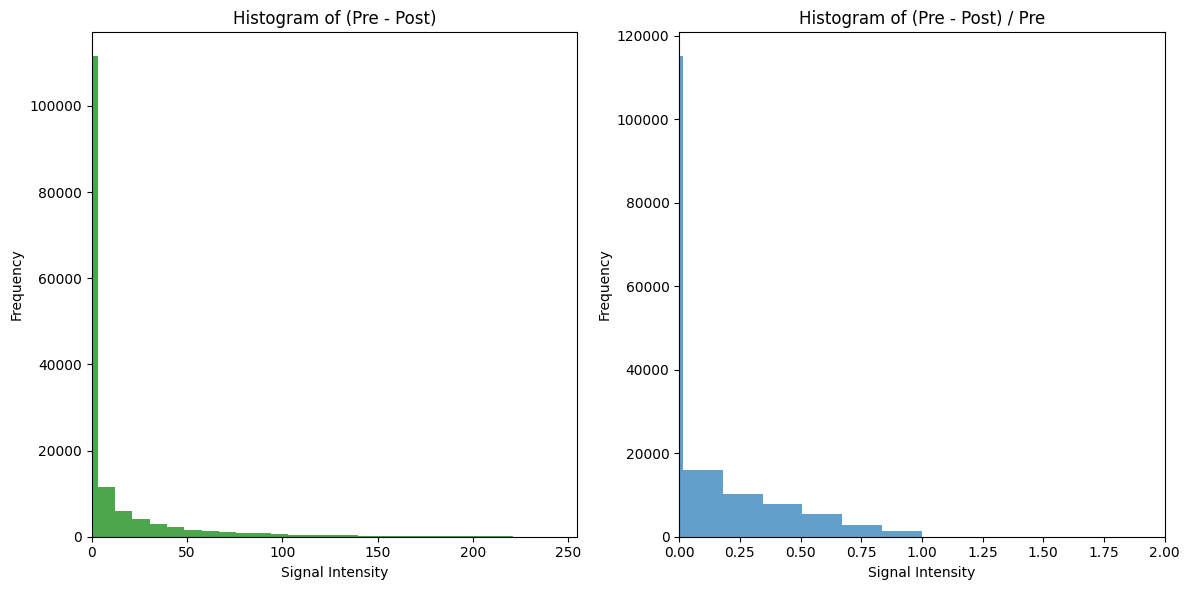

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming `pre_contrast_img` and `post_contrast_img` are already defined

# Handle divide-by-zero by setting errors to ignore and replacing infinities with NaN
with np.errstate(divide='ignore', invalid='ignore'):
    difference_ratio = np.true_divide(pre_contrast_img - post_contrast_img, pre_contrast_img)
    difference_ratio[~np.isfinite(difference_ratio)] = 0  # Replace inf, -inf, NaN with 0

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for (pre - post)
plt.subplot(1, 2, 1)
plt.hist((pre_contrast_img - post_contrast_img).flatten(), bins=255, color='green', alpha=0.7)
plt.title('Histogram of (Pre - Post)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)  # Set x-axis limit to match 8-bit image range

# Histogram for (pre - post) / pre using the precomputed difference_ratio
plt.subplot(1, 2, 2)
plt.hist(difference_ratio.flatten(), bins=500, alpha=0.7)
plt.title('Histogram of (Pre - Post) / Pre')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0,2)

# Show the plots
plt.tight_layout()
plt.show()




### all graphs of original mri image with % cutting

In [7]:
# #plotting pre-post subtraction signal intensity

# post_contrast_img = post_contrast_img.flatten()
# pre_contrast_img = pre_contrast_img.flatten()




# # Calculate (pre - post) / pre
# percentage_change = np.where(pre_contrast_img != 0, 
#                              ((post_contrast_img - pre_contrast_img) / pre_contrast_img) * 100, 
#                              0)

# plt.figure(figsize=(18, 6))

# # Plot 1: Histogram of pre-post
# plt.subplot(1, 3, 1)
# plt.hist(post_contrast_img - pre_contrast_img, 
#          bins=50, 
#          color='brown', 
#          range=(0, 255), 
#          histtype='stepfilled')
# plt.title('Histogram of pre-post')
# plt.xlabel('Signal Intensity Diff.')
# plt.ylabel('Frequency')
# plt.xlim(0, 255)
# plt.ylim(0, 110000)

# # Plot 2: Histogram of (pre-post)/pre
# plt.subplot(1, 3, 2)
# plt.hist(percentage_change, 
#          bins=50, 
#          color='navy', 
#          range=(0, 255), 
#          histtype='stepfilled')
# plt.title('Histogram of (pre-post)/pre')
# plt.xlabel('% change in signal intensity')
# plt.ylabel('Frequency')
# plt.xlim(0, 255)
# plt.ylim(0, 100000)

# # Plot 3: Histogram of (pre-post)/pre with 5% trimming
# plt.subplot(1, 3, 3)
# plt.hist(percentage_change, bins=50, color='navy', range=(12.75, 242.25), histtype='stepfilled')

# # Set xlim to show blank areas for the trimmed regions
# plt.title('Histogram of (pre-post)/pre with 5% trimming')
# plt.xlabel('% change in signal intensity')
# plt.ylabel('Frequency')
# plt.xlim(0, 255)
# plt.ylim(0, 10000)

# # Show the plots
# plt.tight_layout()
# plt.show()




### calculation of breast volume

In [90]:
import numpy as np


mask = np.load('mask/output.npy')


breast_voxels = np.sum(mask == 1)

print(f"Total number of breast voxels: {breast_voxels}")


voxel_volume_mm3 = 0.6641 * 0.6641 * 2.0  


breast_volume_mm3 = breast_voxels * voxel_volume_mm3


breast_volume_cm3 = breast_volume_mm3 / 1000

print(f"Total breast volume: {breast_volume_mm3:.2f} cubic millimeters")
print(f"Total breast volume: {breast_volume_cm3:.2f} cubic centimeters")


Total number of breast voxels: 1780014
Total breast volume: 1570074.91 cubic millimeters
Total breast volume: 1570.07 cubic centimeters


### fgt pre and post calculations

In [11]:

fgt_seg_42 = np.load(fgt_pre_path)
print(fgt_seg_42.shape)
slice_42 = fgt_seg_42[2,:,:,42]
#print(slice_42.shape)
np.save('fgt_pre/slice_42_pre.npy', slice_42)
#print('slice 42 saved')

fgt_seg_42_post = np.load(fgt_post_path)
slice_42_post = fgt_seg_42[2,:,:,42]
np.save('fgt_post/slice_42_post.npy', slice_42_post)
#print('slice 42 saved')

print(slice_42_post.shape)


fgt_2d_pre = np.load('fgt_pre/slice_42_pre.npy')
fgt_2d_post = np.load('fgt_post/slice_42_post.npy')

(3, 512, 512, 106)
(512, 512)


2
2


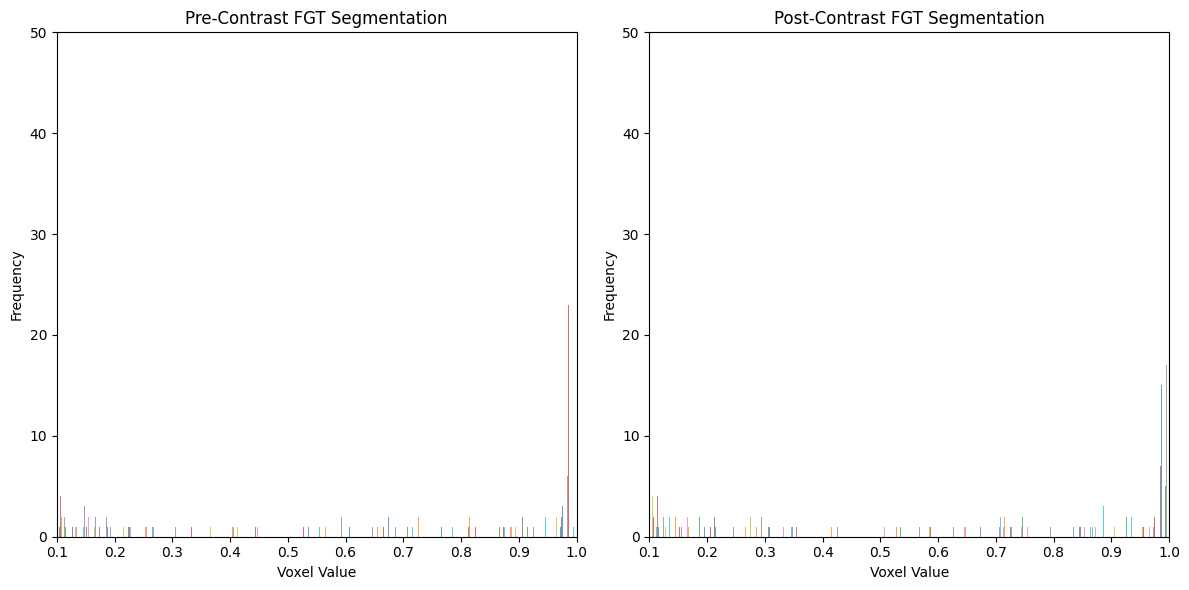

In [25]:
import numpy as np
import matplotlib.pyplot as plt



# # Load the 4D FGT segmentations
# pre_contrast_fgt_4d = np.load('fgt_pre/output.npy')
# post_contrast_fgt_4d = np.load('fgt_post/output.npy')

# # Choose the relevant 3D slice if the segmentations are 4D
# # For this example, assuming the loaded data is already 3D
# pre_contrast_fgt = pre_contrast_fgt_4d  # Adjust if needed
# post_contrast_fgt = post_contrast_fgt_4d  # Adjust if needed

# # Flatten the masks for histogram plotting

# Plot histograms of the FGT segmentations
plt.figure(figsize=(12, 6))

# Flatten the images to 1D arrays
#pre_contrast_flattened = fgt_2d_pre.flatten()
#post_contrast_flattened = fgt_2d_post.flatten()



#fgt_2d_pre_filtered = pre_contrast_flattened[pre_contrast_flattened > 0]  # Filter out background values
#fgt_2d_post_filtered = post_contrast_flattened[post_contrast_flattened > 0]  # Filter out background values
print(fgt_2d_pre.ndim)
print(fgt_2d_post.ndim)

# Histogram for pre-contrast FGT segmentation
plt.subplot(1, 2, 1)
plt.hist(fgt_2d_pre, bins=50, alpha=0.7)
plt.title('Pre-Contrast FGT Segmentation')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')
plt.xlim(0.1,1)  # Adjust xlim based on data range
plt.ylim(0, 50) 
# Histogram for post-contrast FGT segmentation
plt.subplot(1, 2, 2)
plt.hist(fgt_2d_post, bins=50, alpha=0.7)
plt.title('Post-Contrast FGT Segmentation')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')
plt.xlim(0.1,1)  # Adjust xlim based on data range
plt.ylim(0, 50) 


# Show the plots
plt.tight_layout()
plt.show()



In [14]:
fgt_seg_pre = np.load(fgt_pre_path)
fgt_seg_post = np.load(fgt_post_path)

print(fgt_seg_pre.ndim)
print(fgt_seg_post.ndim)

fgt_prepost = fgt_seg_pre - fgt_seg_post

fgt_predivpost = ((fgt_seg_pre-fgt_seg_post)/fgt_seg_pre)*100

print(fgt_prepost.ndim)
print(fgt_predivpost.ndim)


slice_42 = fgt_seg_42[2,:,:,42]
#print(slice_42.shape)
np.save('fgt/pre-postdivpre.npy', slice_42)
#print('slice 42 saved')


slice_42_post = fgt_seg_42_post[2,:,:,42]
np.save('fgt/pre-post.npy', slice_42_post)
#print('slice 42 saved')

fgt_prepost_2d = np.load('fgt/pre-post.npy')
fgt_predivpost_2d = np.load('fgt/pre-postdivpre.npy')


4
4


C:\Users\hari\AppData\Local\Temp\ipykernel_674560\2704070994.py:9: RuntimeWarning: divide by zero encountered in divide
  fgt_predivpost = ((fgt_seg_pre-fgt_seg_post)/fgt_seg_pre)*100
C:\Users\hari\AppData\Local\Temp\ipykernel_674560\2704070994.py:9: RuntimeWarning: invalid value encountered in divide
  fgt_predivpost = ((fgt_seg_pre-fgt_seg_post)/fgt_seg_pre)*100


4
4


C:\Users\hari\AppData\Local\Temp\ipykernel_674560\2704070994.py:9: RuntimeWarning: overflow encountered in multiply
  fgt_predivpost = ((fgt_seg_pre-fgt_seg_post)/fgt_seg_pre)*100


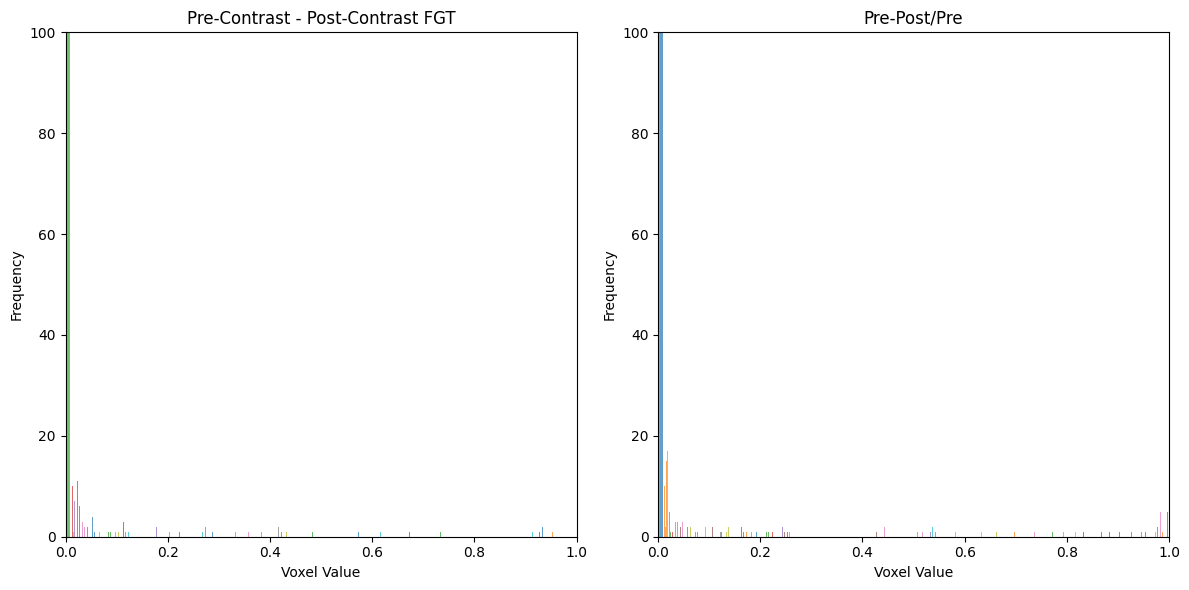

In [16]:


plt.figure(figsize=(12, 6))



plt.subplot(1, 2, 1)
plt.hist(fgt_prepost_2d, bins=100, alpha=0.7)
plt.title('Pre-Contrast - Post-Contrast FGT')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')

plt.xlim(0,1)  
plt.ylim(0, 100)


plt.subplot(1,2,2)
plt.hist(fgt_predivpost_2d, bins=100, alpha=0.7)
plt.title('Pre-Post/Pre')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')
plt.xlim(0,1)
plt.ylim(0, 100)



plt.tight_layout()
plt.show()


(post-pre/pre)*100

count voxels above 20%

cutting down to 3 dims

multiply by voxel dimensions

BPE Volume

In [82]:
#data prep

slice_42_pre_3d = fgt_seg_42[2,:,:,42]
np.save('fgt_pre/42_2d_pre.npy', slice_42_pre_3d)

slice_42_post_3d = fgt_seg_42_post[2,:,:,42]
np.save('fgt_post/42_2d_post.npy', slice_42_post_3d)

In [91]:
import numpy as np

pre_contrast = np.load('fgt_pre/42_2d_pre.npy')
post_contrast = np.load('fgt_post/42_2d_post.npy')


percent_enhancement = np.where(pre_contrast != 0, (post_contrast - pre_contrast) / pre_contrast * 100, 0)

above_20_percent = percent_enhancement > 20

voxel_count_above_20 = np.sum(above_20_percent)
print(f"Number of voxels with >20% enhancement: {voxel_count_above_20}")


print(f"Shape of the data: {percent_enhancement.shape}")
    

voxel_dimensions = (0.6641,0.6641,2.0) 
voxel_volume = np.prod(voxel_dimensions) 

bpe_volume = (voxel_count_above_20 * voxel_volume)/1000

print(f"BPE Volume: {bpe_volume:.2f} cubic cm")

#for loop of incorporating every slice 0-108 and adding them up together


Number of voxels with >20% enhancement: 65597
Shape of the data: (512, 512)
BPE Volume: 57.86 cubic cm


C:\Users\hari\AppData\Local\Temp\ipykernel_674560\3111739374.py:7: RuntimeWarning: overflow encountered in multiply
  percent_enhancement = np.where(pre_contrast != 0, (post_contrast - pre_contrast) / pre_contrast * 100, 0)


determing voxel dimensions -- Voxel dimensions (x, y, z): ('0.6641', '0.6641', '2.0') mm -- SLICE GAP = 2mm

In [68]:
import pydicom

dicom_series_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523'
dicom_series_path_post = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-03969'

dicom_file = pydicom.dcmread('data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm')

pixel_spacing = dicom_file.PixelSpacing  
slice_thickness = dicom_file.SliceThickness

#Print voxel dimensions
print(f"Pixel Spacing (mm): {pixel_spacing}")
print(f"Slice Thickness (mm): {slice_thickness}")



Pixel Spacing (mm): [0.6641, 0.6641]
Slice Thickness (mm): 2


In [88]:
import pydicom 


dicom_file = pydicom.dcmread('data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm')

pixel_spacing = dicom_file.PixelSpacing 
slice_thickness = dicom_file.SliceThickness
slice_gap = dicom_file.get('SpacingBetweenSlices', 0)  
print(f"Pixel Spacing (mm): {pixel_spacing}")
print(f"Slice Thickness (mm): {slice_thickness}")
print(f"Slice Gap (mm): {slice_gap}")


Pixel Spacing (mm): [0.6641, 0.6641]
Slice Thickness (mm): 2
Slice Gap (mm): 2


bpe percentage

In [93]:
#calculating bpe percentage

total_breast_volume_Cm3 = 1570

bpe_volume_Cm3 = 57.86  #sum of all the slices

bpe_percentage = (bpe_volume_Cm3 / total_breast_volume_Cm3) * 100

print(f"BPE Percentage: {bpe_percentage:.2f}%")


# should we take off top and bottom 5%


BPE Percentage: 3.69%


### Updates 9/21/2024: 
    changed measurements to cubic cc's
    removed slice thickness part
    talk with Dr. Duong regarding slice gap

### TODO:
   --incoporate every slice in BPE calculation (0-108)
   --talk with Dr. Duong about percentasge cutting (top and bottom 5%) , which dataset we should use for our project (ISPY-2 already done)